In [47]:
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import marsilea as ma
import marsilea.plotter as mp
import scienceplots
%matplotlib widget
import pickle
plt.style.use(['science', 'nature'])
import numpy as np
from itertools import combinations, product

In [48]:
tool_map = {
    "scapa": "scAPA",
    "scapatrap": "scAPAtrap",
    "sierra": "Sierra",
    "maaper": "MAAPER",
    "scapture": "SCAPTURE",
    "scape": "SCAPE",
    "infernape": "Infernape",
}

protocol_map = {
    "Visium": "10X Visium",
    "VisiumHD": "10X Visium HD",
    "Chromium": "10X Chromium",
    "Dropseq": "Drop-seq",
    "Stereoseq": "Stereo-seq",
    "Slideseq": "Slide-seq V2",
    "SpatialTranscriptomics": "ST",
    "Microwell": "Microwell-seq",
}

protocol_order = ["10X Chromium", "Drop-seq", "Microwell-seq", "10X Visium","Stereo-seq", "Slide-seq V2", "ST"]
tool_order = ["SCAPE", "scAPAtrap", "Infernape", "SCAPTURE", "scAPA",  "Sierra"]

color = [
    "#386b98",
    "#269a51",
    "#edaa4d",
    "#d34123",
    "#7e648a",
    "#454545",
    "#929292",
]

palette=sns.color_palette(color, 7)
mm = 1/25.4

plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5
plt.rcParams['axes.labelsize'] = 5
plt.rcParams["xtick.top"] = False
plt.rcParams["ytick.right"] = False
plt.rcParams["lines.linewidth"] = 0.5
plt.rcParams["legend.fontsize"] = 5
plt.rcParams["legend.title_fontsize"] = 6
plt.rcParams['hatch.linewidth'] = 0.5

In [49]:
match_performance_df = pd.read_csv('/root/apabenchmark/data/performance/match_performance.tsv', sep='\t')
match_performance_df["tool"] = match_performance_df["tool"].map(tool_map)
match_performance_df["protocol"] = match_performance_df["protocol"].map(protocol_map)
match_performance_df["protocol"] = pd.Categorical(match_performance_df["protocol"], protocol_order)
match_performance_df["tool"] = pd.Categorical(match_performance_df["tool"], tool_order)

In [50]:
pas_f1 = match_performance_df[match_performance_df["match_type"] == "pas"].set_index(["tool", "sample"])["f1"].rename("PAS")
te_f1 = match_performance_df[match_performance_df["match_type"] == "te"].set_index(["tool", "sample"])["f1"].rename("TE")
f1_df = pd.concat([pas_f1, te_f1], axis=1)

In [51]:
from scipy.stats import spearmanr
spearmanr(f1_df["PAS"], f1_df["TE"])

SignificanceResult(statistic=0.9061935974640275, pvalue=0.0)

In [52]:
#pas
pas_match_performance_df = match_performance_df[match_performance_df['match_type'] == 'pas']
pas_match_performance_f1 = pas_match_performance_df.groupby(['tool', 'protocol'])['f1'].mean().reset_index().pivot(index='tool', columns='protocol', values='f1')
pas_match_performance_precision = pas_match_performance_df.groupby(['tool', 'protocol'])['precision'].mean().reset_index().pivot(index='tool', columns='protocol', values='precision')
pas_match_performance_recall = pas_match_performance_df.groupby(['tool', 'protocol'])['recall'].mean().reset_index().pivot(index='tool', columns='protocol', values='recall')


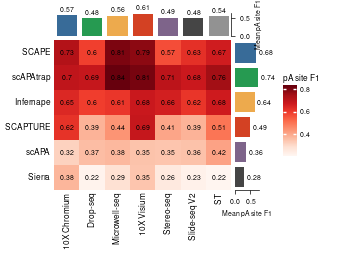

In [53]:
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.minor.bottom"] = True
plt.rcParams["ytick.left"] = False

cmap = ["Reds", "Blues", "Greens"]
h = ma.Heatmap(
    pas_match_performance_f1,
    cmap=cmap[0],
    label="pA site F1",
    width=45*mm,
    height=38*mm,
)
h.add_layer(mp.TextMesh(np.around(pas_match_performance_f1.to_numpy(),2), color="black", fontsize=5))
h.add_right(mp.Numbers(
    pas_match_performance_f1.mean(axis=1).to_numpy().round(2),
    color=palette[0:6][::-1], 
    label="Mean pA site F1",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm
)
h.add_top(mp.Numbers(
    pas_match_performance_f1.mean().round(2),
    color=palette, 
    label="Mean pA site F1",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm,
    name="top"
)


# h.add_left(mp.Chunk(["" for i in range(7)], palette, ),pad=0.05)
h.add_left(mp.Labels(tool_order, rotation=0, fontsize=6), size=7*mm, pad=1*mm)
# h.add_bottom(mp.Chunk(["" for i in range(7)], palette),pad=0.05)
h.add_bottom(mp.Labels(protocol_order, rotation=90, fontsize=6), size=10*mm, pad=1*mm)
h.add_legends("right", align_legends="top",pad=2.5*mm)
h.render()

h.get_ax("top").yaxis.set_label_position("right")
h.get_ax("top").yaxis.set_ticks_position("right")
h.get_ax("top").tick_params(axis='y', which='minor', right=False)
h.get_ax("top").spines["right"].set_visible(True)
h.get_ax("top").spines["left"].set_visible(False)

plt.savefig('/root/apabenchmark/plot/fig4/pas_f1.pdf', bbox_inches='tight', dpi=300)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.minor.bottom"] = False


/root/miniconda3/envs/apasim_analysis/lib/python3.10/site-packages/marsilea/base.py:1436: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure()


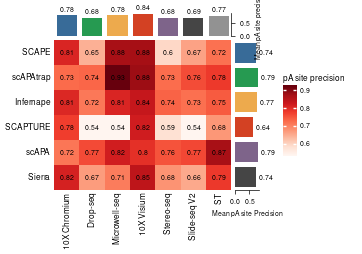

In [54]:
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.minor.bottom"] = True
plt.rcParams["ytick.left"] = False

cmap = ["Reds", "Blues", "Greens"]
h = ma.Heatmap(
    pas_match_performance_precision,
    cmap=cmap[0],
    label="pA site precision",
    width=45*mm,
    height=38*mm,
)
h.add_layer(mp.TextMesh(np.around(pas_match_performance_precision.to_numpy(),2), color="black", fontsize=5))
h.add_right(mp.Numbers(
    pas_match_performance_precision.mean(axis=1).to_numpy().round(2),
    color=palette[0:6][::-1], 
    label="Mean pA site Precision",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm
)
h.add_top(mp.Numbers(
    pas_match_performance_precision.mean().round(2),
    color=palette, 
    label="Mean pA site precision",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm,
    name="top"
)


# h.add_left(mp.Chunk(["" for i in range(7)], palette, ),pad=0.05)
h.add_left(mp.Labels(tool_order, rotation=0, fontsize=6), size=7*mm, pad=1*mm)
# h.add_bottom(mp.Chunk(["" for i in range(7)], palette),pad=0.05)
h.add_bottom(mp.Labels(protocol_order, rotation=90, fontsize=6), size=10*mm, pad=1*mm)
h.add_legends("right", align_legends="top",pad=2.5*mm)
h.render()

h.get_ax("top").yaxis.set_label_position("right")
h.get_ax("top").yaxis.set_ticks_position("right")
h.get_ax("top").tick_params(axis='y', which='minor', right=False)
h.get_ax("top").spines["right"].set_visible(True)
h.get_ax("top").spines["left"].set_visible(False)

plt.savefig('/root/apabenchmark/plot/fig4/pas_precision.pdf', bbox_inches='tight', dpi=300)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.minor.bottom"] = False

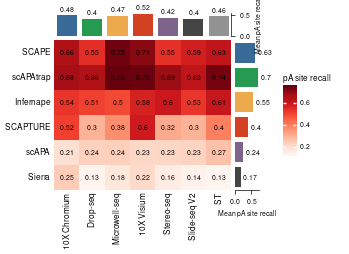

In [55]:
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.minor.bottom"] = True
plt.rcParams["ytick.left"] = False

cmap = ["Reds", "Blues", "Greens"]
h = ma.Heatmap(
    pas_match_performance_recall,
    cmap=cmap[0],
    label="pA site recall",
    width=45*mm,
    height=38*mm,
)
h.add_layer(mp.TextMesh(np.around(pas_match_performance_recall.to_numpy(),2), color="black", fontsize=5))
h.add_right(mp.Numbers(
    pas_match_performance_recall.mean(axis=1).to_numpy().round(2),
    color=palette[0:6][::-1], 
    label="Mean pA site recall",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm
)
h.add_top(mp.Numbers(
    pas_match_performance_recall.mean().round(2),
    color=palette, 
    label="Mean pA site recall",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm,
    name="top"
)


# h.add_left(mp.Chunk(["" for i in range(7)], palette, ),pad=0.05)
h.add_left(mp.Labels(tool_order, rotation=0, fontsize=6), size=7*mm, pad=1*mm)
# h.add_bottom(mp.Chunk(["" for i in range(7)], palette),pad=0.05)
h.add_bottom(mp.Labels(protocol_order, rotation=90, fontsize=6), size=10*mm, pad=1*mm)
h.add_legends("right", align_legends="top",pad=2.5*mm)
h.render()

h.get_ax("top").yaxis.set_label_position("right")
h.get_ax("top").yaxis.set_ticks_position("right")
h.get_ax("top").tick_params(axis='y', which='minor', right=False)
h.get_ax("top").spines["right"].set_visible(True)
h.get_ax("top").spines["left"].set_visible(False)

plt.savefig('/root/apabenchmark/plot/fig4/pas_recall.pdf', bbox_inches='tight', dpi=300)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.minor.bottom"] = False

In [56]:
#te
te_match_performance_df = match_performance_df[match_performance_df['match_type'] == 'te']
te_match_performance_f1 = te_match_performance_df.groupby(['tool', 'protocol'])['f1'].mean().reset_index().pivot(index='tool', columns='protocol', values='f1')
te_match_performance_precision = te_match_performance_df.groupby(['tool', 'protocol'])['precision'].mean().reset_index().pivot(index='tool', columns='protocol', values='precision')
te_match_performance_recall = te_match_performance_df.groupby(['tool', 'protocol'])['recall'].mean().reset_index().pivot(index='tool', columns='protocol', values='recall')


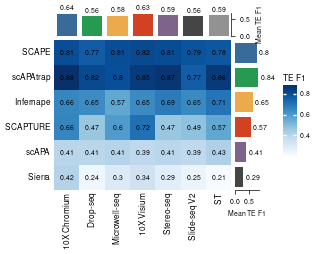

In [57]:
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.minor.bottom"] = True
plt.rcParams["ytick.left"] = False

cmap = ["Reds", "Blues", "Greens"]
h = ma.Heatmap(
    te_match_performance_f1,
    cmap=cmap[1],
    label="TE F1",
    width=45*mm,
    height=38*mm,
)
h.add_layer(mp.TextMesh(
    np.around(te_match_performance_f1.to_numpy(),2),
    color="black",
    fontsize=5
    )
)
h.add_right(mp.Numbers(
    te_match_performance_f1.mean(axis=1).to_numpy().round(2),
    color=palette[0:6][::-1], 
    label="Mean TE F1",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm
)
h.add_top(mp.Numbers(
    te_match_performance_f1.mean().round(2),
    color=palette, 
    label="Mean TE F1",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm,
    name="top"
)


# h.add_left(mp.Chunk(["" for i in range(7)], palette, ),pad=0.05)
h.add_left(mp.Labels(tool_order, rotation=0, fontsize=6), size=7*mm, pad=1*mm)
# h.add_bottom(mp.Chunk(["" for i in range(7)], palette),pad=0.05)
h.add_bottom(mp.Labels(protocol_order, rotation=90, fontsize=6), size=10*mm, pad=1*mm)
h.add_legends("right", align_legends="top",pad=2.5*mm)
h.render()

h.get_ax("top").yaxis.set_label_position("right")
h.get_ax("top").yaxis.set_ticks_position("right")
h.get_ax("top").tick_params(axis='y', which='minor', right=False)
h.get_ax("top").spines["right"].set_visible(True)
h.get_ax("top").spines["left"].set_visible(False)

plt.savefig('/root/apabenchmark/plot/fig4/te_f1.pdf', bbox_inches='tight', dpi=300)

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.minor.bottom"] = False


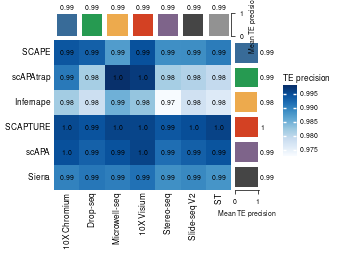

In [58]:
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.minor.bottom"] = True
plt.rcParams["ytick.left"] = False

cmap = ["Reds", "Blues", "Greens"]
h = ma.Heatmap(
    te_match_performance_precision,
    cmap=cmap[1],
    label="TE precision",
    width=45*mm,
    height=38*mm,
)
h.add_layer(mp.TextMesh(
    np.around(te_match_performance_precision.to_numpy(),2),
    color="black",
    fontsize=5
    )
)
h.add_right(mp.Numbers(
    te_match_performance_precision.mean(axis=1).to_numpy().round(2),
    color=palette[0:6][::-1], 
    label="Mean TE precision",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm
)
h.add_top(mp.Numbers(
    te_match_performance_precision.mean().round(2),
    color=palette, 
    label="Mean TE precision",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm,
    name="top"
)


# h.add_left(mp.Chunk(["" for i in range(7)], palette, ),pad=0.05)
h.add_left(mp.Labels(tool_order, rotation=0, fontsize=6), size=7*mm, pad=1*mm)
# h.add_bottom(mp.Chunk(["" for i in range(7)], palette),pad=0.05)
h.add_bottom(mp.Labels(protocol_order, rotation=90, fontsize=6), size=10*mm, pad=1*mm)
h.add_legends("right", align_legends="top",pad=2.5*mm)
h.render()

h.get_ax("top").yaxis.set_label_position("right")
h.get_ax("top").yaxis.set_ticks_position("right")
h.get_ax("top").tick_params(axis='y', which='minor', right=False)
h.get_ax("top").spines["right"].set_visible(True)
h.get_ax("top").spines["left"].set_visible(False)

plt.savefig('/root/apabenchmark/plot/fig4/te_precision.pdf', bbox_inches='tight', dpi=300)

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.minor.bottom"] = False

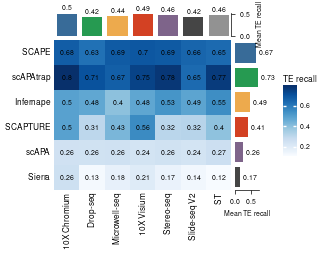

In [59]:
plt.rcParams["xtick.direction"] = "out"
plt.rcParams["ytick.direction"] = "out"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.minor.bottom"] = True
plt.rcParams["ytick.left"] = False

cmap = ["Reds", "Blues", "Greens"]
h = ma.Heatmap(
    te_match_performance_recall,
    cmap=cmap[1],
    label="TE recall",
    width=45*mm,
    height=38*mm,
)
h.add_layer(mp.TextMesh(
    np.around(te_match_performance_recall.to_numpy(),2),
    color="black",
    fontsize=5
    )
)
h.add_right(mp.Numbers(
    te_match_performance_recall.mean(axis=1).to_numpy().round(2),
    color=palette[0:6][::-1], 
    label="Mean TE recall",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm
)
h.add_top(mp.Numbers(
    te_match_performance_recall.mean().round(2),
    color=palette, 
    label="Mean TE recall",
    show_value=True,
    props={"fontsize": 5}
    ),
    size=6*mm,
    pad=1*mm,
    name="top"
)


# h.add_left(mp.Chunk(["" for i in range(7)], palette, ),pad=0.05)
h.add_left(mp.Labels(tool_order, rotation=0, fontsize=6), size=7*mm, pad=1*mm)
# h.add_bottom(mp.Chunk(["" for i in range(7)], palette),pad=0.05)
h.add_bottom(mp.Labels(protocol_order, rotation=90, fontsize=6), size=10*mm, pad=1*mm)
h.add_legends("right", align_legends="top",pad=2.5*mm)
h.render()

h.get_ax("top").yaxis.set_label_position("right")
h.get_ax("top").yaxis.set_ticks_position("right")
h.get_ax("top").tick_params(axis='y', which='minor', right=False)
h.get_ax("top").spines["right"].set_visible(True)
h.get_ax("top").spines["left"].set_visible(False)


plt.savefig('/root/apabenchmark/plot/fig4/te_recall.pdf', bbox_inches='tight', dpi=300)

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.minor.bottom"] = False